<a href="https://colab.research.google.com/github/joshIsac/DeepLearningLab/blob/main/2348523_DL_lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [88]:
def optimization(w):
  return 0.5*w**2-30*w +100
#derivative
def df(w):
  return w-30
# Initialize parameters
w = 20  # initial price
v = 0  # momentum term
lr = 0.1
momentum = 0.9

# Perform iterations
for i in range(5):
 v = momentum * v - lr * df(w)
 w= w+v
 print("Iteration", i+1, "- Optimal price:", w)

# Print the optimal price after 5 iterations
print("The optimal price after 5 iterations is:", w)

Iteration 1 - Optimal price: 21.0
Iteration 2 - Optimal price: 22.8
Iteration 3 - Optimal price: 25.14
Iteration 4 - Optimal price: 27.732
Iteration 5 - Optimal price: 30.2916
The optimal price after 5 iterations is: 30.2916


In [89]:
#2)excercise
healthcare_df=pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')
healthcare_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [90]:
healthcare_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [91]:
healthcare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [92]:
healthcare_df.describe(include='object')

,gender,smoking_history
count,100000,100000
unique,3,6
top,Female,No Info
freq,58552,35816


In [93]:
healthcare_df['diabetes'].unique()

array([0, 1])

In [94]:
#count of gender
count_gender=healthcare_df['gender'].value_counts()
print("gendercounts:",count_gender)
#count of blood group
hypertension=healthcare_df['hypertension'].value_counts()
print("hypertension counts is :", hypertension)

disease_count=healthcare_df['heart_disease'].value_counts()
print("heartdisease counts is :",disease_count)

gendercounts: Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
hypertension counts is : 0    92515
1     7485
Name: hypertension, dtype: int64
heartdisease counts is : 0    96058
1     3942
Name: heart_disease, dtype: int64


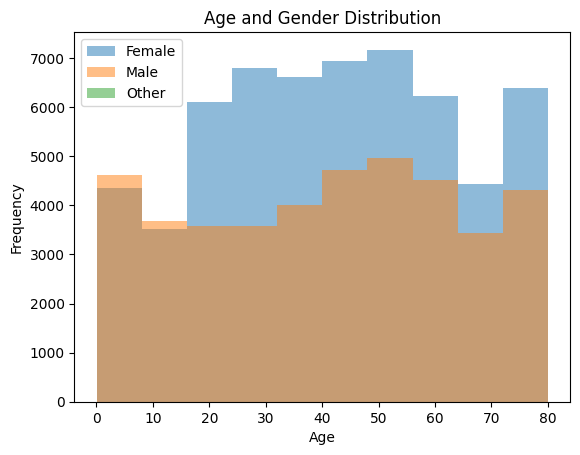

In [95]:
#Plotting the age and gender distribution
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called healthcare_df with 'Age' and 'Gender' columns
healthcare_df.groupby('gender')['age'].plot(kind='hist', alpha=0.5, legend=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age and Gender Distribution')
plt.show()


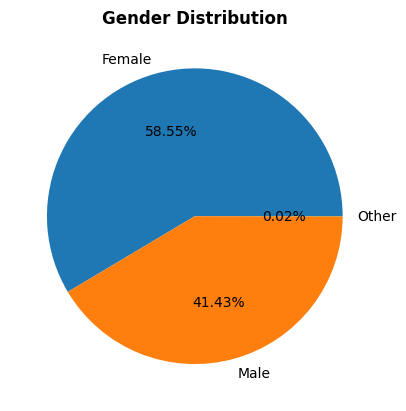

In [96]:
plt.title("Gender Distribution", fontsize = 12, weight='bold')
plt.pie(count_gender,labels=count_gender.index,radius=1, autopct='%.2f%%')
plt.show()

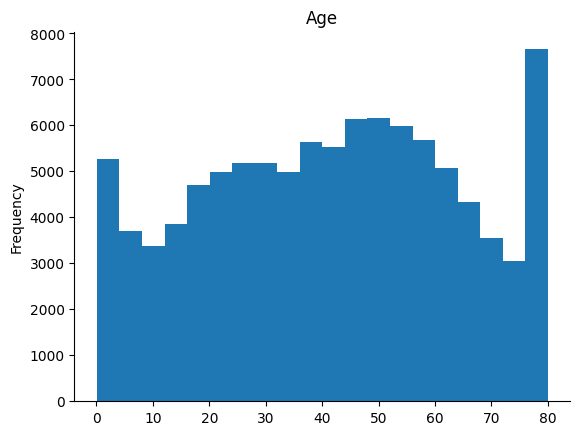

In [97]:
# @title Age
from matplotlib import pyplot as plt
healthcare_df['age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

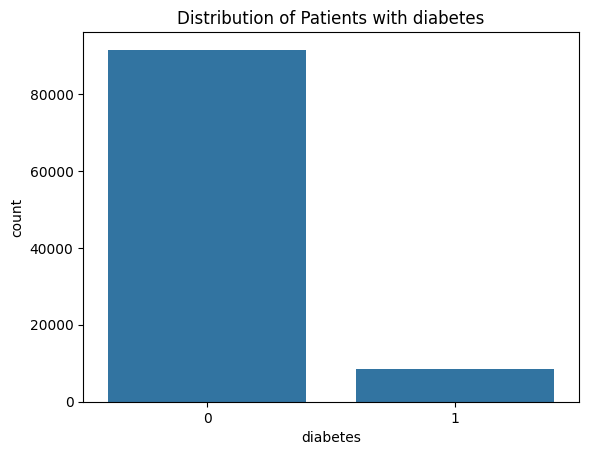

In [98]:
sn.countplot(data = healthcare_df, x = 'diabetes')
plt.title("Distribution of Patients with diabetes")
plt.show()

In [99]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
lb = LabelEncoder()
cat_cols = [col for col in healthcare_df.columns if healthcare_df[col].dtype == 'object']
for col in cat_cols:
    healthcare_df[col] = lb.fit_transform(healthcare_df[col])
healthcare_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,3,27.83,5.7,155,0
99998,0,24.0,0,0,4,35.42,4.0,100,0


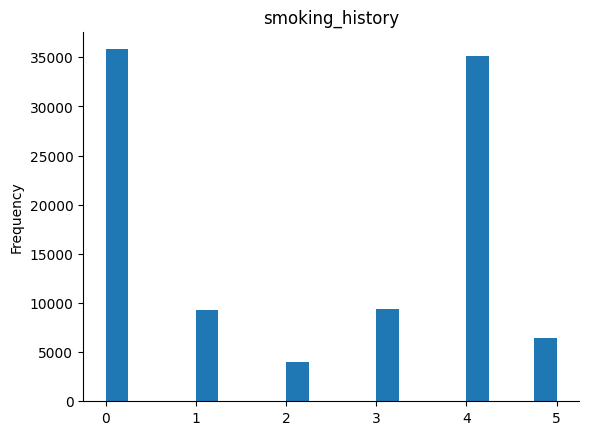

In [100]:
# @title smoking history distribution
from matplotlib import pyplot as plt
healthcare_df['smoking_history'].plot(kind='hist', bins=20, title='smoking_history')
plt.gca().spines[['top', 'right',]].set_visible(False)

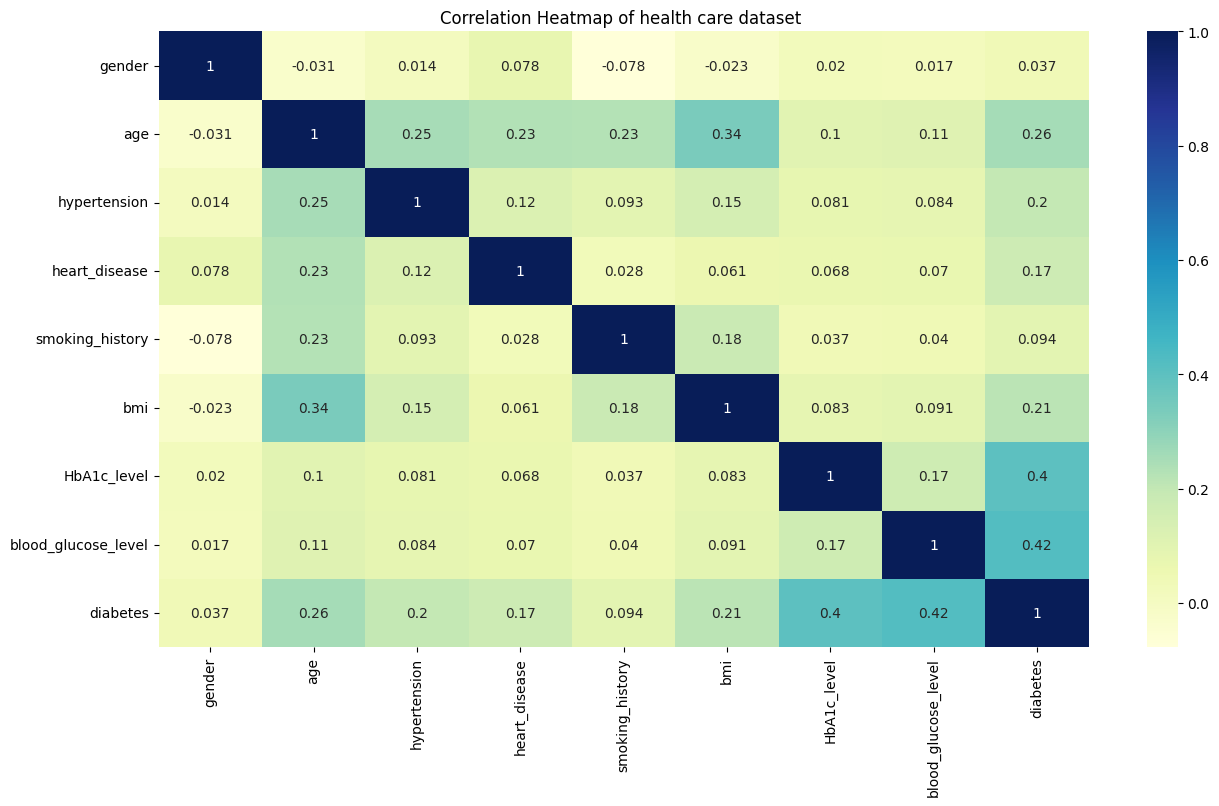

In [101]:
plt.figure(figsize=(15, 8))
sn.heatmap(healthcare_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of health care dataset ')
plt.show()

In [102]:
X=healthcare_df.drop(columns=['diabetes'])
Y = healthcare_df['diabetes']

In [103]:
X.shape

(100000, 8)

In [104]:
Y.shape

(100000,)

In [105]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [106]:

from sklearn.model_selection import train_test_split

# Perform train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Print the shapes of train and test sets
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (70000, 8) (70000,)
Test set: (30000, 8) (30000,)


In [107]:
import tensorflow as tf
import numpy as np
from keras import layers, Sequential, regularizers
from imblearn.over_sampling import RandomOverSampler
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

In [108]:
model1 = Sequential()
#with 128 input nodes
model1 = Sequential()
model1.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model1.add(Dense(units=64, activation='relu'))
model1.add(Dense(units=1, activation='sigmoid'))
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1152      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9473 (37.00 KB)
Trainable params: 9473 (37.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [109]:
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [110]:
model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
2188/2188 [==============================] - 6s 2ms/step - loss: 0.1149 - accuracy: 0.9609 - val_loss: 0.0983 - val_accuracy: 0.9683
Epoch 2/10
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0925 - accuracy: 0.9682 - val_loss: 0.0877 - val_accuracy: 0.9699
Epoch 3/10
2188/2188 [==============================] - 5s 2ms/step - loss: 0.0871 - accuracy: 0.9702 - val_loss: 0.0860 - val_accuracy: 0.9694
Epoch 4/10
2188/2188 [==============================] - 9s 4ms/step - loss: 0.0851 - accuracy: 0.9707 - val_loss: 0.0833 - val_accuracy: 0.9708
Epoch 5/10
2188/2188 [==============================] - 5s 2ms/step - loss: 0.0838 - accuracy: 0.9713 - val_loss: 0.0832 - val_accuracy: 0.9708
Epoch 6/10
2188/2188 [==============================] - 6s 3ms/step - loss: 0.0832 - accuracy: 0.9716 - val_loss: 0.0872 - val_accuracy: 0.9685
Epoch 7/10
2188/2188 [==============================] - 5s 2ms/step - loss: 0.0830 - accuracy: 0.9717 - val_loss: 0.0833 - val_accuracy:

In [113]:
y_pred = model1.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

938/938 [==============================] - 2s 2ms/step


In [114]:
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


Accuracy: 0.9717, Precision: 0.9835, Recall: 0.6781, F1-Score: 0.8027


In [117]:
model2 = Sequential()
model2.add(Dense(64, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l1(0.01)))  # L1
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # L2
model2.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))  # Elastic Net
model2.add(Dense(1, activation='sigmoid'))

In [118]:
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [122]:
fit_model=model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
2188/2188 [==============================] - 9s 4ms/step - loss: 0.1522 - accuracy: 0.9606 - val_loss: 0.1539 - val_accuracy: 0.9596
Epoch 2/10
2188/2188 [==============================] - 6s 3ms/step - loss: 0.1519 - accuracy: 0.9605 - val_loss: 0.1535 - val_accuracy: 0.9588
Epoch 3/10
2188/2188 [==============================] - 13s 6ms/step - loss: 0.1512 - accuracy: 0.9607 - val_loss: 0.1534 - val_accuracy: 0.9587
Epoch 4/10
2188/2188 [==============================] - 14s 6ms/step - loss: 0.1506 - accuracy: 0.9607 - val_loss: 0.1527 - val_accuracy: 0.9591
Epoch 5/10
2188/2188 [==============================] - 12s 5ms/step - loss: 0.1503 - accuracy: 0.9606 - val_loss: 0.1520 - val_accuracy: 0.9587
Epoch 6/10
2188/2188 [==============================] - 6s 3ms/step - loss: 0.1500 - accuracy: 0.9603 - val_loss: 0.1530 - val_accuracy: 0.9583
Epoch 7/10
2188/2188 [==============================] - 5s 2ms/step - loss: 0.1497 - accuracy: 0.9605 - val_loss: 0.1508 - val_accura

In [120]:
y_pred = model2.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

938/938 [==============================] - 2s 2ms/step


In [121]:
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


Accuracy: 0.9591, Precision: 0.9060, Recall: 0.5787, F1-Score: 0.7063


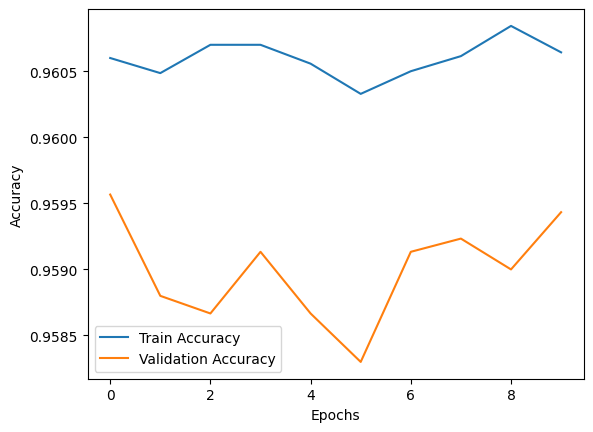

In [125]:
plt.plot(fit_model.history['accuracy'], label='Train Accuracy')
plt.plot(fit_model.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()